In [1]:
import radarsimpy

print("`RadarSimPy` used in this example is version: " + str(radarsimpy.__version__))

`RadarSimPy` used in this example is version: 12.6.1


# PMCW Radar

## Introduction

Phase-modulated continuous wave (PMCW) radar is a type of radar signal that changes the phase of the transmitted signal. It has been the focus of research in recent years for automotive radar. PMCW radar allows large maximum velocity, and permits interference mitigation. It is an emerging technology for autonomous cars.

[`RadarSimPy`](https://radarsimx.com/radarsimx/radarsimpy/) offers support for various modulation schemes. This sample serves as a demonstration of how to utilize pulse modulation to construct a Phase-Modulated Continuous Wave (PMCW) radar system, showcasing the fundamental signal processing techniques involved.

```
|                       prp
|                  +-----------+
|
|            +---f[1]--->  /            /            /
|                         /            /            /
|                        /            /            /
|                       /            /            /
|                      /            /            /     ...
|                     /            /            /
|                    /            /            /
|                   /            /            /
|      +---f[0]--->/            /            /
|
|                  +-------+
|                 t[0]    t[1]
|
|    Pulse         +--------------------------------------+
|    modulation    |pulse_amp[0]|pulse_amp[1]|pulse_amp[2]|  ...
|                  |pulse_phs[0]|pulse_phs[1]|pulse_phs[2]|  ...
|                  +--------------------------------------+
|
|    Waveform      +--------------------------------------+
|    modulation    |           amp / phs / mod_t          |  ...
|                  +--------------------------------------+
```

## Create Radar Model

### Phase Code

The phase codes in the transmitter channels are defined with `phs` and `t_mod`. `amp` can also be used if there is an amplitude modulation.

In this example, 2 binary phase code sequences are assigned to 2 different transmitter channels.


In [2]:
import numpy as np

code1 = np.array(
    [
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        1,
        1,
        1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
    ]
)
code2 = np.array(
    [
        1,
        -1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        -1,
        1,
        -1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        -1,
        -1,
        1,
        1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        -1,
        1,
        1,
        1,
        1,
        1,
        -1,
        -1,
        1,
        -1,
        1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        -1,
        -1,
        -1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        -1,
        1,
        1,
        1,
        -1,
        1,
    ]
)

# convert binary code to phases in degrees
phase_code1 = np.zeros(np.shape(code1))
phase_code2 = np.zeros(np.shape(code2))
phase_code1[np.where(code1 == 1)] = 0
phase_code1[np.where(code1 == -1)] = 180
phase_code2[np.where(code2 == 1)] = 0
phase_code2[np.where(code2 == -1)] = 180

# define modulation timing (4e-9 s per code)
t_mod1 = np.arange(0, len(phase_code1)) * 4e-9
t_mod2 = np.arange(0, len(phase_code2)) * 4e-9

_Plot the phase code sequences_


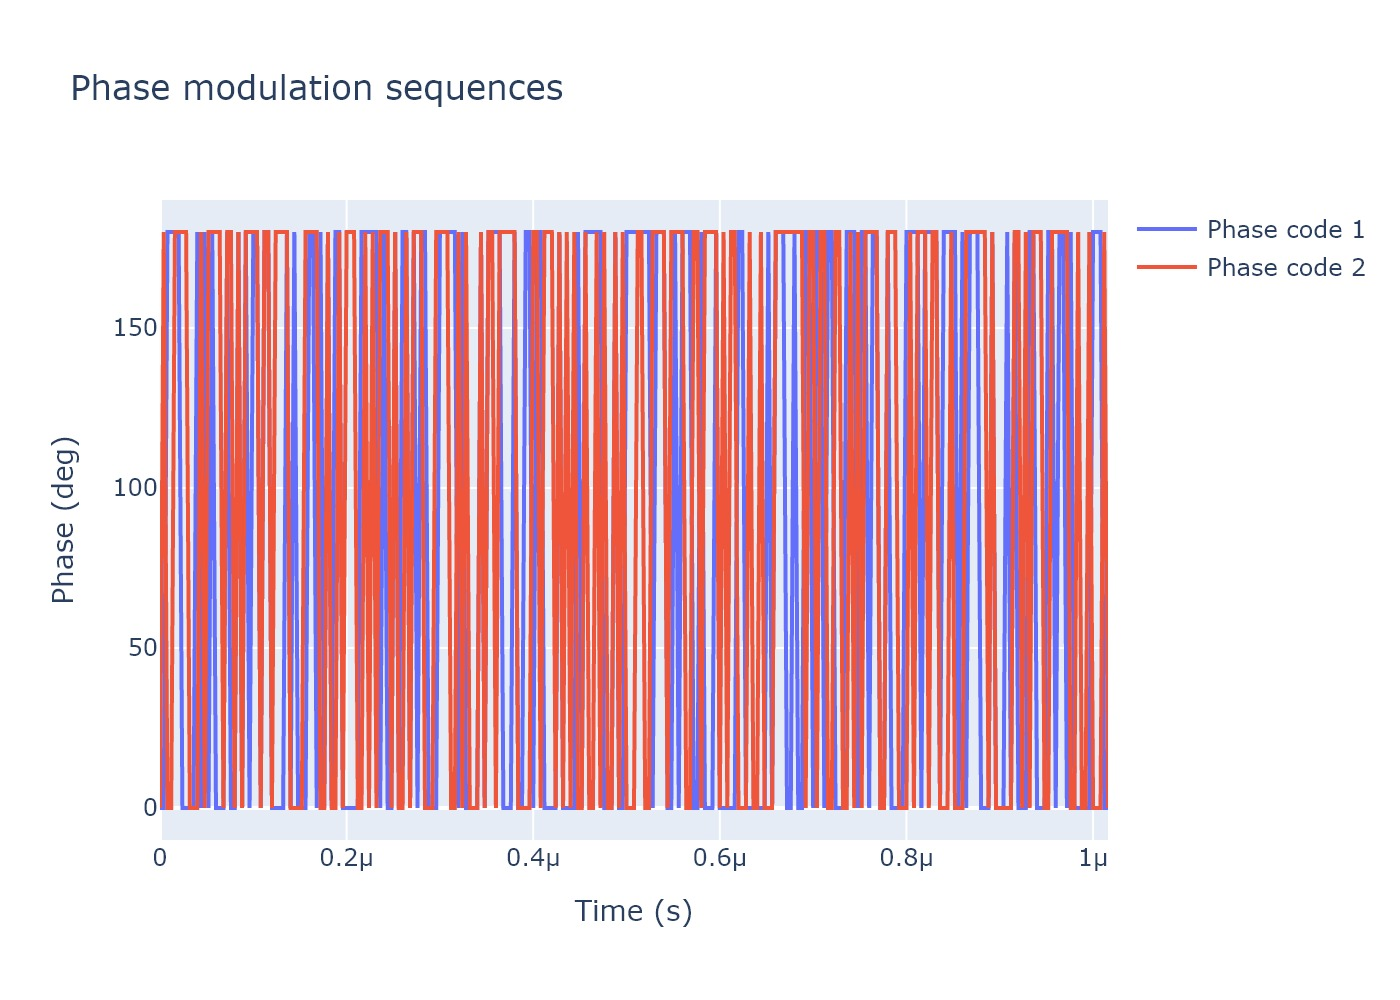

In [3]:
import plotly.graph_objs as go
from IPython.display import Image

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=t_mod1,
        y=phase_code1,
        name="Phase code 1",
    )
)
fig.add_trace(
    go.Scatter(
        x=t_mod2,
        y=phase_code2,
        name="Phase code 2",
    )
)

fig.update_layout(
    title="Phase modulation sequences",
    yaxis=dict(title="Phase (deg)"),
    xaxis=dict(title="Time (s)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Transmitter

Setup the basic transmitter parameters through [Transmitter](https://radarsimx.github.io/radarsimpy/radar.html#radarsimpy-transmitter) module.

There are 2 transmitter channels assigned with 2 different phase code sequences. The location of these 2 transmitter channels have 1 m offset in x-axis.


In [4]:
from radarsimpy import Radar, Transmitter, Receiver

tx_channel_1 = dict(
    location=(0, 0, 0),
    mod_t=t_mod1,
    phs=phase_code1,
)

tx_channel_2 = dict(
    location=(1, 0, 0),
    mod_t=t_mod2,
    phs=phase_code2,
)

tx = Transmitter(
    f=24.125e9, t=2.1e-6, tx_power=20, pulses=256, channels=[tx_channel_1, tx_channel_2]
)

### Receiver

Setup the receiver parameters through [Receiver](https://radarsimx.github.io/radarsimpy/radar.html#radarsimpy-receiver) module.

- `fs` – Sampling rate (sps)
- `noise_figure` – Noise figure (dB)
- `rf_gain` – Total RF gain (dB)
- `load_resistor` – Load resistor to convert power to voltage (Ohm)
- `baseband_gain` – Total baseband gain (dB)


In [5]:
rx = Receiver(
    fs=250e6,
    noise_figure=10,
    rf_gain=20,
    baseband_gain=30,
    load_resistor=1000,
    channels=[dict(location=(0, 0, 0))],
)

### Radar System

Use the defined transmitter and receiver to create the radar system.


In [6]:
radar = Radar(transmitter=tx, receiver=rx)

### Targets

The propertities of targets are defined here. There are 3 targets in this simulation. The locations of the targets are defined through $(x, y, z)$ coordinates in meters, and the speeds of the targets are defined trough $(v_x, v_y, v_z)$ in $m/s$. The propertites of the targets also includes radar cross-section (RCS (dBsm)) and phase (degree).


In [7]:
target_1 = dict(location=(20, 0, 0), speed=(-200, 0, 0), rcs=10, phase=0)

target_2 = dict(location=(70, 0, 0), speed=(0, 0, 0), rcs=35, phase=0)

target_3 = dict(location=(33, 10, 0), speed=(100, 0, 0), rcs=20, phase=0)

targets = [target_1, target_2, target_3]

## Simulate Baseband Signals

Use the `simulator.sim_radar` module to simulate the baseband samples from the defined radar system and targets.

The output baseband data is a dict including the timestamp and baseband. Both of them are 3-D matrix:

`[channels, pulses, ADC samples]`


In [8]:
from radarsimpy.simulator import sim_radar

data = sim_radar(radar, targets)
timestamp = data["timestamp"]
data_matrix = data["baseband"]+data["noise"]

For convenience, the baseband signals for the two transmitter channels are initially kept separate. As a result, the total size of the baseband data matrix is $2 \times$ pulses $\times$ samples.

However, in a realistic scenario, these two transmitter channels should transmit simultaneously. Consequently, it becomes necessary to combine the baseband signals from these two channels.


In [9]:
baseband = data_matrix[0, :, :] + data_matrix[1, :, :]

_Plot the baseband samples_


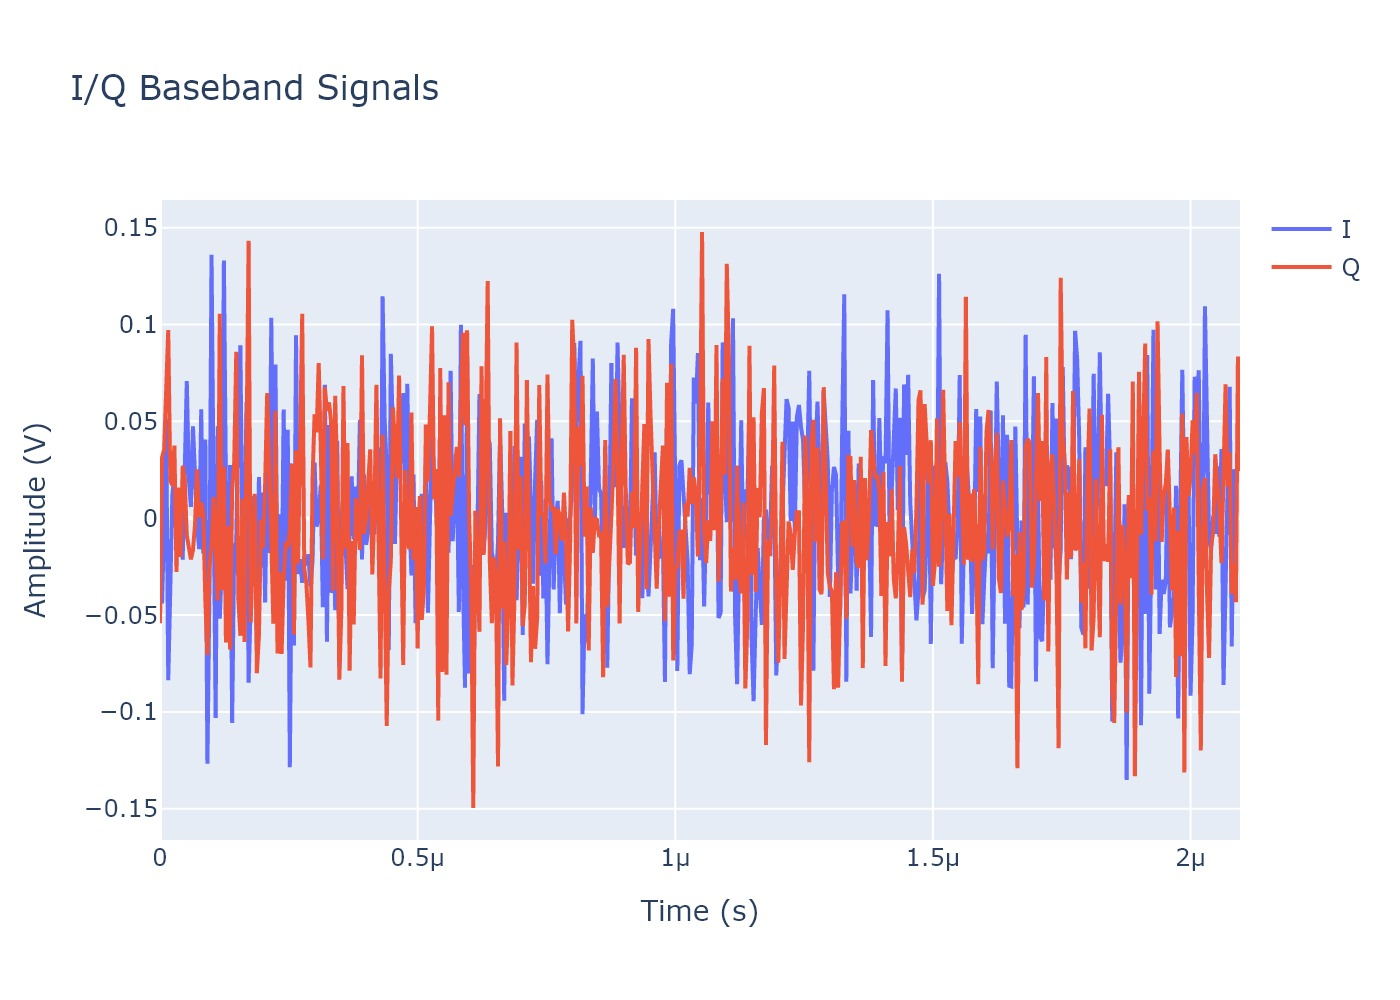

In [10]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],
        y=np.real(baseband[0, :]),
        name="I",
    )
)
fig.add_trace(
    go.Scatter(
        x=timestamp[0, 0, :],
        y=np.imag(baseband[0, :]),
        name="Q",
    )
)

fig.update_layout(
    title="I/Q Baseband Signals",
    yaxis=dict(title="Amplitude (V)"),
    xaxis=dict(title="Time (s)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

## Radar Signal Processing

### Demodulate the 2 channels separately

Channel 1


In [11]:
range_profile = np.zeros(
    (
        radar.array_prop["size"],
        radar.radar_prop["transmitter"].waveform_prop["pulses"],
        255,
    ),
    dtype=complex,
)

for pulse_idx in range(0, radar.radar_prop["transmitter"].waveform_prop["pulses"]):
    for bin_idx in range(0, 255):
        range_profile[0, pulse_idx, bin_idx] = np.sum(
            code1 * baseband[pulse_idx, bin_idx : (bin_idx + 255)]
        )

Channel 2


In [12]:
for pulse_idx in range(0, radar.radar_prop["transmitter"].waveform_prop["pulses"]):
    for bin_idx in range(0, 255):
        range_profile[1, pulse_idx, bin_idx] = np.sum(
            code2 * baseband[pulse_idx, bin_idx : (bin_idx + 255)]
        )

_Plot range profiles_


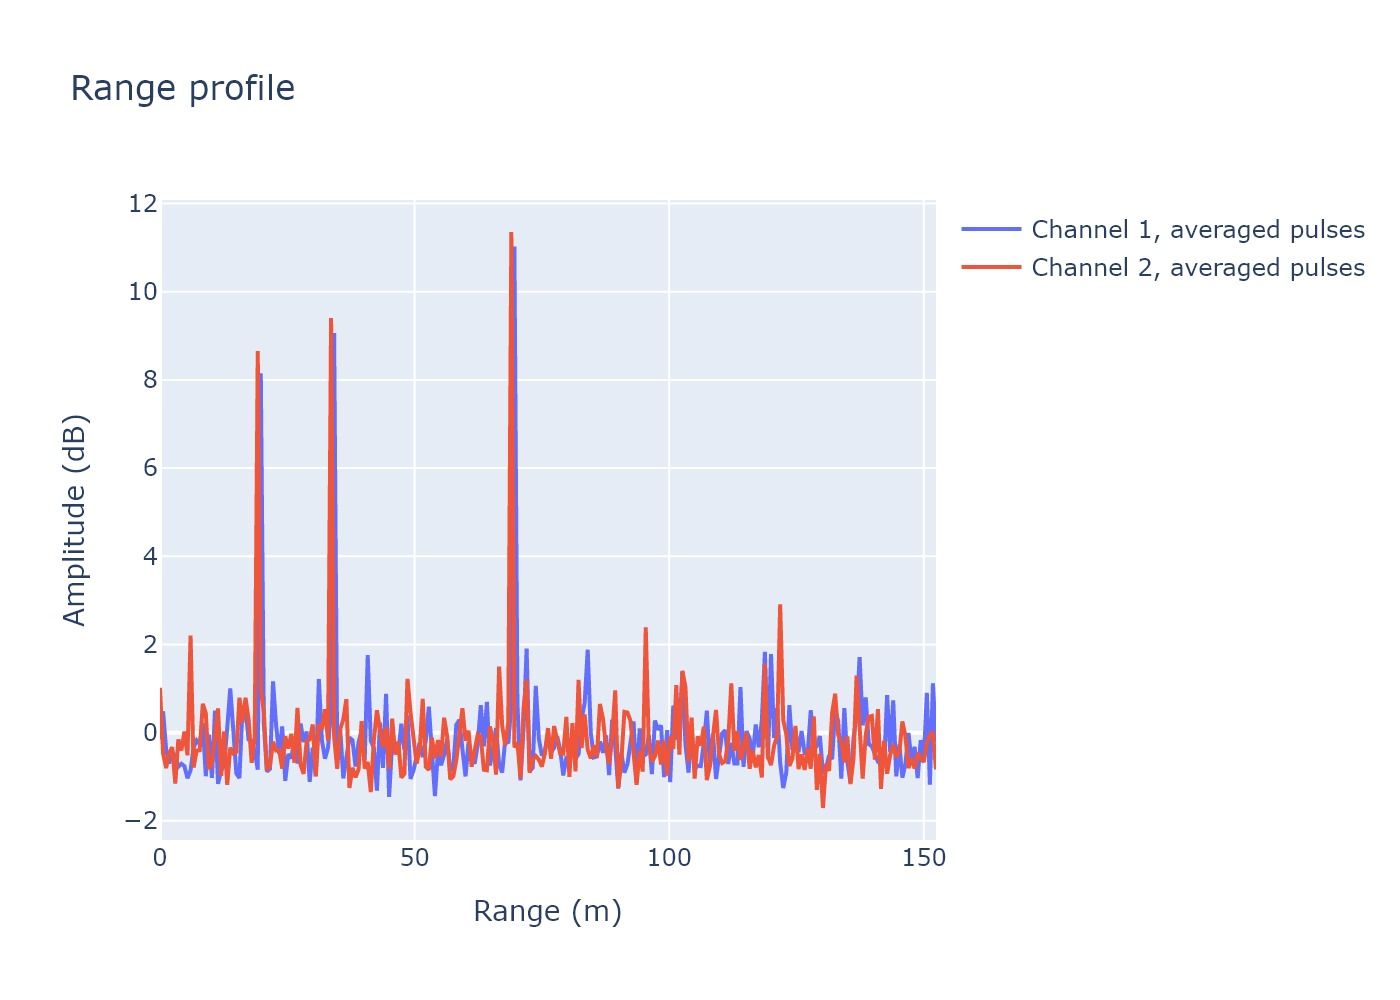

In [13]:
bin_size = 3e8 / 2 * 4e-9
range_bin = np.arange(0, 255, 1) * bin_size

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=range_bin,
        y=20 * np.log10(np.mean(np.abs(range_profile[0, :, :]), axis=0)),
        name="Channel 1, averaged pulses",
    )
)
fig.add_trace(
    go.Scatter(
        x=range_bin,
        y=20 * np.log10(np.mean(np.abs(range_profile[1, :, :]), axis=0)),
        name="Channel 2, averaged pulses",
    )
)

fig.update_layout(
    title="Range profile",
    yaxis=dict(title="Amplitude (dB)"),
    xaxis=dict(title="Range (m)"),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))

### Doppler processing


In [14]:
from scipy import signal

doppler_window = signal.windows.chebwin(
    radar.radar_prop["transmitter"].waveform_prop["pulses"], at=50
)

range_doppler = np.zeros(np.shape(range_profile), dtype=complex)
for ii in range(0, radar.array_prop["size"]):
    for jj in range(0, 255):
        range_doppler[ii, :, jj] = np.fft.fftshift(
            np.fft.fft(
                range_profile[ii, :, jj] * doppler_window,
                n=radar.radar_prop["transmitter"].waveform_prop["pulses"],
            )
        )
unambiguous_speed = (
    3e8 / radar.radar_prop["transmitter"].waveform_prop["prp"] / 24.125e9 / 2
)

Plot range-Doppler map


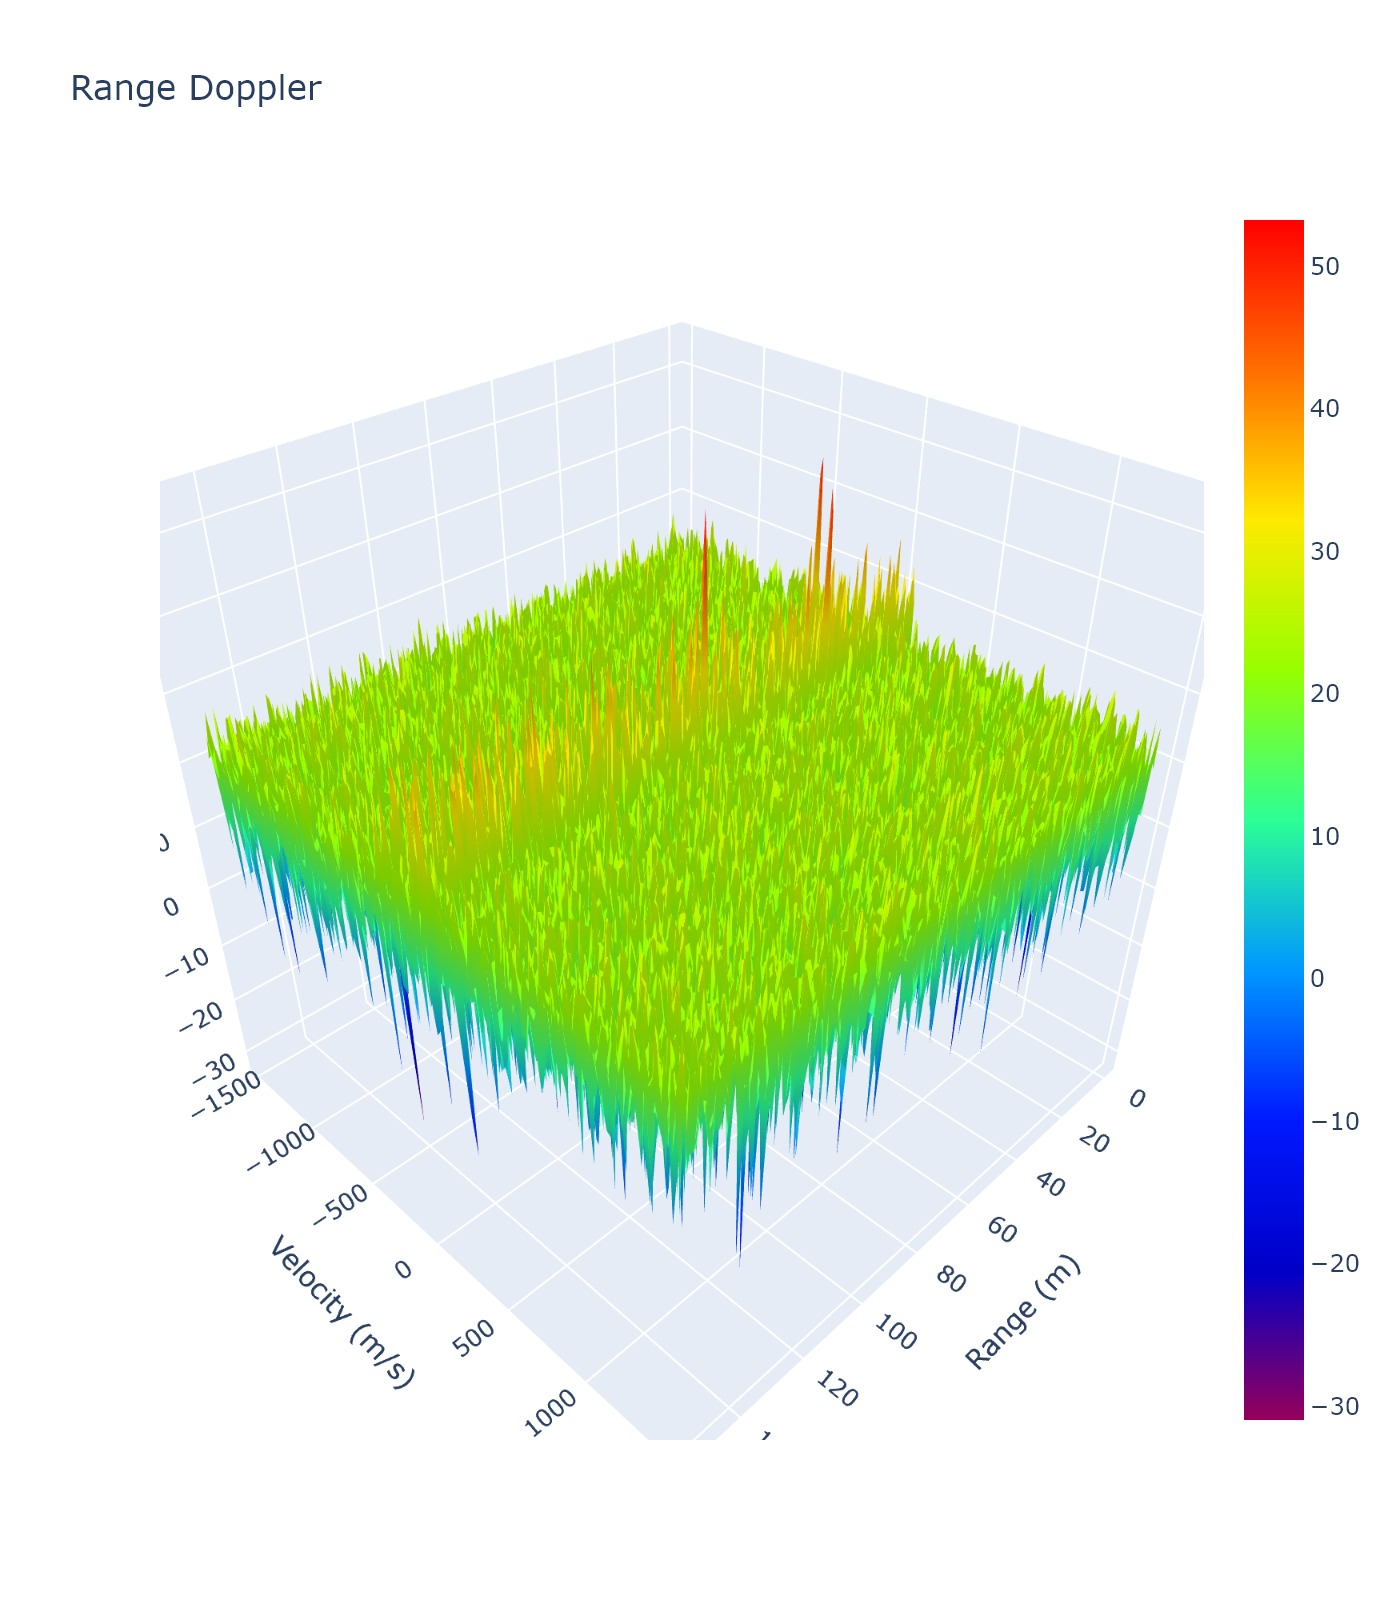

In [15]:
range_axis = np.arange(0, 255, 1) * bin_size

doppler_axis = np.linspace(
    -unambiguous_speed / 2,
    unambiguous_speed / 2,
    radar.radar_prop["transmitter"].waveform_prop["pulses"],
    endpoint=False,
)

fig = go.Figure()
fig.add_trace(
    go.Surface(
        x=range_axis,
        y=doppler_axis,
        z=20 * np.log10(np.abs(range_doppler[0, :, :])),
        colorscale="Rainbow",
    )
)


fig.update_layout(
    title="Range Doppler",
    height=800,
    scene=dict(
        xaxis=dict(title="Range (m)"),
        yaxis=dict(title="Velocity (m/s)"),
        zaxis=dict(title="Amplitude (dB)"),
        aspectmode="cube",
    ),
)

# uncomment this to display interactive plot
# fig.show()

# display static image to reduce size on radarsimx.com
img_bytes = fig.to_image(format="jpg", scale=2)
display(Image(img_bytes))